### Import Titanic dataset

In [1]:
import joblib

data = joblib.load( 'preprocessed_data\\Titanic.pkl')

### Create train test, check ratio of y values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["X_encoded_scaled"], data["y"], test_size=0.33, random_state=42)
print(y_train.value_counts())

Survived
0.0    288
1.0    189
Name: count, dtype: int64


### Manually optimise DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score
from IPython.display import Image

class_weights = {0.0: 1, 1.0: 1.5}

model = DecisionTreeClassifier(class_weight=class_weights , 
                               max_depth=5,
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.06, 
                               min_impurity_decrease=0.0,
                               ccp_alpha=0.0)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("Train ACC: ", accuracy_score(y_train, pred_train))
print("Test ACC: ", accuracy_score(y_test, pred_test))

# Export the decision tree to DOT format
'''dot_data = export_graphviz(
    model, out_file=None, 
    feature_names=X_train.columns.tolist(),
    class_names=["0", "1"],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png") 
Image(filename="decision_tree.png")'''

Train ACC:  0.8155136268343816
Test ACC:  0.7872340425531915


'dot_data = export_graphviz(\n    model, out_file=None, \n    feature_names=X_train.columns.tolist(),\n    class_names=["0", "1"],\n    filled=True, rounded=True,\n    special_characters=True\n)\ngraph = graphviz.Source(dot_data)\ngraph.render("decision_tree", format="png") \nImage(filename="decision_tree.png")'

### Manually optimise RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

class_weights = {0.0: 1, 1.0: 1.5}

model = RandomForestClassifier(n_estimators=10,
                               bootstrap=True,
                               n_jobs=-1,
                               class_weight=class_weights, 
                               max_depth=5,
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.06, 
                               min_impurity_decrease=0.0,
                               ccp_alpha=0.0,
                               random_state=0)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("Train ACC: ", accuracy_score(y_train, pred_train))
print("Test ACC: ", accuracy_score(y_test, pred_test))

Train ACC:  0.8155136268343816
Test ACC:  0.723404255319149


### Check feature importance

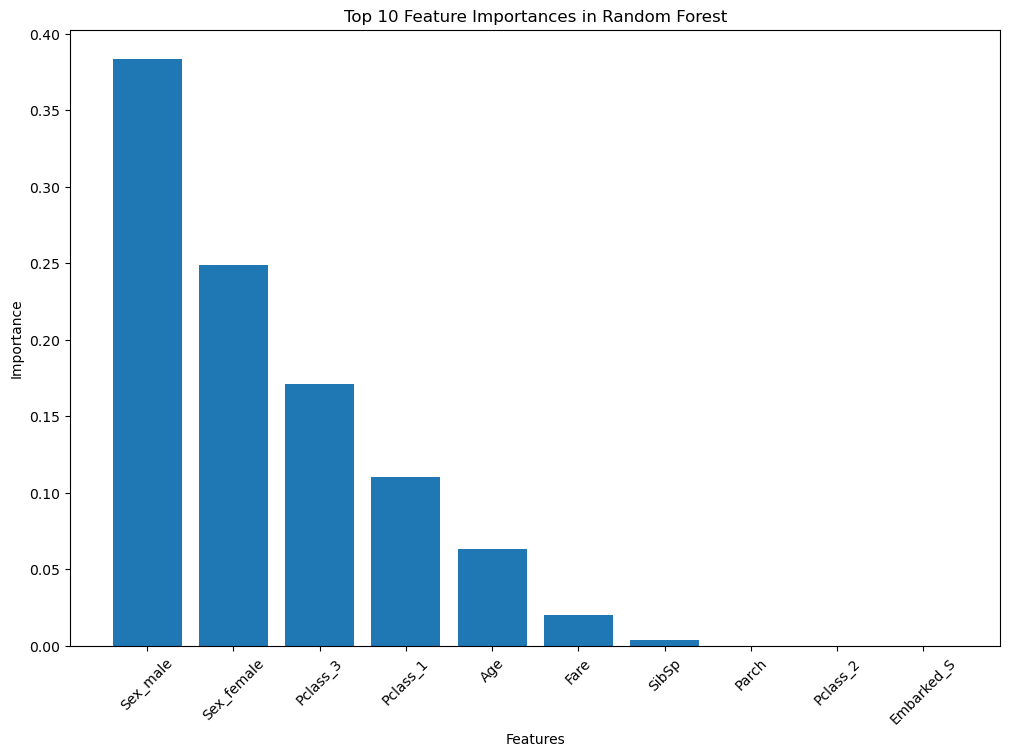

In [75]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
feature_names = X_train.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = np.array(feature_importances)[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

top_n = 10
top_n_indices = sorted_indices[:top_n]
top_n_feature_importances = sorted_feature_importances[:top_n]
top_n_feature_names = sorted_feature_names[:top_n]

plt.figure(figsize=(12, 8))
plt.title("Top 10 Feature Importances in Random Forest")
plt.bar(top_n_feature_names, top_n_feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

### Manually optimise GradientBoostingClassifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier(learning_rate=0.07,
                               n_estimators=50,
                               max_depth=5,
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.06, 
                               min_impurity_decrease=0.0,
                               ccp_alpha=0.0,
                               random_state=0)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("Train ACC: ", accuracy_score(y_train, pred_train))
print("Test ACC: ", accuracy_score(y_test, pred_test))

Train ACC:  0.8867924528301887
Test ACC:  0.8


### Check feature importance

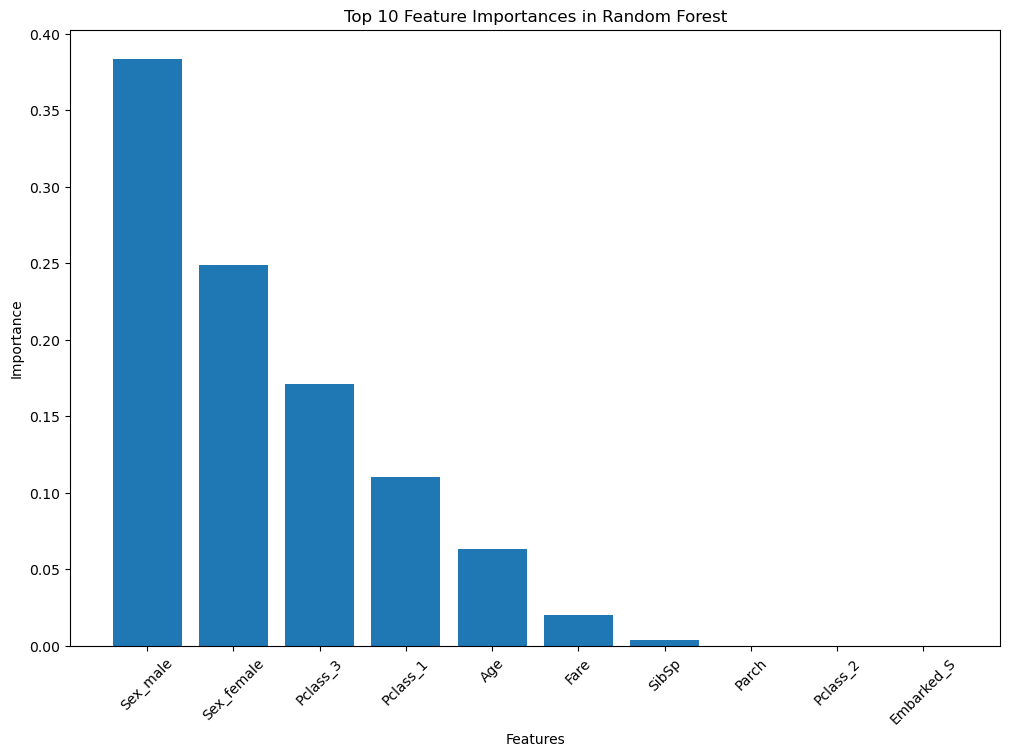

In [77]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
feature_names = X_train.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = np.array(feature_importances)[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

top_n = 10
top_n_indices = sorted_indices[:top_n]
top_n_feature_importances = sorted_feature_importances[:top_n]
top_n_feature_names = sorted_feature_names[:top_n]

plt.figure(figsize=(12, 8))
plt.title("Top 10 Feature Importances in Random Forest")
plt.bar(top_n_feature_names, top_n_feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

### Manually optimise xgbClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier
model = XGBClassifier(learning_rate=0.05,
                          n_estimators=50,
                          max_depth=5,
                          min_child_weight=1,  # XGBoost uses min_child_weight instead of min_samples_split
                          gamma=0,             # XGBoost uses gamma (equivalent to min_impurity_decrease)
                          subsample=1,         # Subsample rate, similar to min_samples_split
                          colsample_bytree=1,  # Subsampling features, analogous to max_features
                          reg_alpha=0,         # L1 regularization, similar to ccp_alpha
                          reg_lambda=1,        # L2 regularization
                          random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Print accuracy
print("Train ACC: ", accuracy_score(y_train, pred_train))
print("Test ACC: ", accuracy_score(y_test, pred_test))

Train ACC:  0.9119496855345912
Test ACC:  0.7829787234042553


### Manually optimise lgbClassifier

In [ ]:
import lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Create a LightGBM classifier
model = LGBMClassifier(learning_rate=0.05,
                           n_estimators=100,
                           max_depth=50,
                           min_child_samples=10,   # LightGBM uses min_child_samples, similar to min_samples_split
                           min_child_weight=1,    # Minimum sum of hessian in a child (similar to min_impurity_decrease in GBM)
                           subsample=1,           # Fraction of data to use for training, similar to min_samples_split
                           colsample_bytree=1,    # Fraction of features to use for each tree
                           reg_alpha=0,           # L1 regularization (similar to ccp_alpha in GBM)
                           reg_lambda=1,          # L2 regularization
                           random_state=0,
                           verbose=-1)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Print accuracy
print("Train ACC: ", accuracy_score(y_train, pred_train))
print("Test ACC: ", accuracy_score(y_test, pred_test))

Train ACC:  0.9308176100628931
Test ACC:  0.8


### Manually optimise CatBoostClassifier

In [136]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Create a CatBoost classifier
model = CatBoostClassifier(learning_rate=0.1,
                            iterations=50,          # Equivalent to n_estimators
                            depth=5,                # Equivalent to max_depth
                            min_data_in_leaf=20,    # Equivalent to min_child_samples
                            subsample=1,            # Equivalent to subsample
                            colsample_bylevel=1,    # Equivalent to colsample_bytree
                            l2_leaf_reg=1,          # Equivalent to reg_lambda
                            cat_features=[],        # Specify any categorical features
                            verbose=0,              # Turn off verbosity
                            random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Print accuracy
print("Train ACC: ", accuracy_score(y_train, pred_train))
print("Test ACC: ", accuracy_score(y_test, pred_test))


Train ACC:  0.8805031446540881
Test ACC:  0.8085106382978723


## Best result is:
### CatBoostClassifier
### Train ACC:  0.8805031446540881
### Test ACC:  0.8085106382978723